In [ ]:
# Importing Necessary Modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score , confusion_matrix , classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns
import matplotlib.pyplot as plt

import imblearn
from imblearn.combine import SMOTEENN

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# This is supervised learning model 'y' is the target variable and classifier is the model :

In [ ]:
# This is supervised learning model 'y' is the target variable and classifier is the model :
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [ ]:
df.shape


(32773, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32773 entries, 0 to 32772
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32773 non-null  int64  
 1   job             32773 non-null  object 
 2   marital         32772 non-null  object 
 3   education_qual  32772 non-null  object 
 4   call_type       32772 non-null  object 
 5   day             32772 non-null  float64
 6   mon             32772 non-null  object 
 7   dur             32772 non-null  float64
 8   num_calls       32772 non-null  float64
 9   prev_outcome    32772 non-null  object 
 10  y               32772 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.8+ MB


# Find unique values in the all the columns





In [ ]:
for i in df.columns:
  print(i,':',df[i].unique())

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'managem']
marital : ['married' 'single' 'divorced' nan]
education_qual : ['tertiary' 'secondary' 'unknown' 'primary' nan]
call_type : ['unknown' 'cellular' 'telephone' nan]
day : [ 5.  6.  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28. 29.
 30.  2.  3.  4. 11. 17. 18. 24. 25.  1. 10. 22. 31. nan]
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' nan]
dur : [ 261.  151.   76. ... 1463. 1095.   nan]
num_calls : [ 1.  2.  3.  5.  4.  6.  7.  8.  9. 10. 11. 12. 13. 19. 14. 24. 16. 32.
 18. 22. 15. 17. 25. 21. 43. 51. 63. 41. 26. 28. 55. 50. 38. 23. 20. 29.
 31. 37. 30. 46. 27. 58. 33. 35. 34.

In [ ]:
# to find duplicates :
df.duplicated().sum()

6

In [ ]:
# to find duplicates row and print:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28.0,may,124.0,1.0,unknown,no
8138,29,admin.,single,secondary,unknown,2.0,jun,121.0,4.0,unknown,no
11630,39,blue-collar,married,primary,unknown,19.0,jun,112.0,4.0,unknown,no
13400,36,blue-collar,married,secondary,cellular,9.0,jul,183.0,1.0,unknown,no
19826,36,management,married,tertiary,cellular,8.0,aug,75.0,2.0,unknown,no
19854,32,technician,single,tertiary,cellular,8.0,aug,31.0,2.0,unknown,no


In [ ]:
# drop the duplicates :
df = df.drop_duplicates()
df.shape

(32767, 11)

In [ ]:
modes = df['job'].mode()
modes

0    blue-collar
Name: job, dtype: object

In [ ]:
 # replace 'unknown' from 'job' column with 'mode' :
df['job'].replace('unknown',df['job'].mode()[0],inplace=True)

In [ ]:
# check the count of 'job' :
df['job'].value_counts()

blue-collar      7513
management       6891
technician       5842
admin.           3516
services         3077
retired          1267
self-employed    1194
entrepreneur     1189
housemaid         987
unemployed        972
student           318
managem             1
Name: job, dtype: int64

In [ ]:
# check the count of 'education_qual' :
df['education_qual'].value_counts()

secondary    16943
tertiary      9359
primary       5159
unknown       1305
Name: education_qual, dtype: int64

In [ ]:
# replace 'unknown' from 'education_qual' column with 'mode' :
df['education_qual'].replace('unknown',df['education_qual'].mode()[0],inplace=True)

In [ ]:
# check the count of 'education_qual' :
df['education_qual'].value_counts()

secondary    18248
tertiary      9359
primary       5159
Name: education_qual, dtype: int64

In [ ]:
# check the count of 'call_type' :
# Unknown value is large so it is defined as a category
df['call_type'].value_counts()

cellular     18236
unknown      12762
telephone     1768
Name: call_type, dtype: int64

In [ ]:
# Unknown value is large so it is defined as a category
df['prev_outcome'].value_counts()

unknown    30275
failure     1768
other        629
success       94
Name: prev_outcome, dtype: int64

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47,blue-collar,married,secondary,unknown,5.0,may,92.0,1.0,unknown,no
4,33,blue-collar,single,secondary,unknown,5.0,may,198.0,1.0,unknown,no


# Converting the target value 'y' from 'str' to 'int'

In [ ]:
# encode the 'target' column :
df['y'] = df['y'].map({'yes':1,'no':0})
df.tail()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
32768,30,blue-collar,married,secondary,cellular,17.0,apr,191.0,1.0,failure,0.0
32769,39,blue-collar,married,primary,cellular,17.0,apr,206.0,1.0,unknown,0.0
32770,29,technician,married,secondary,cellular,17.0,apr,367.0,3.0,failure,1.0
32771,39,management,married,secondary,telephone,17.0,apr,141.0,4.0,unknown,0.0
32772,32,managem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                 float64
dtype: object

In [ ]:
df.describe()

,age,day,dur,num_calls,y
count,32767.000000,32766.000000,32766.000000,32766.000000,32766.000000
mean,41.058260,16.499725,254.719618,3.017152,0.060581
std,9.618344,8.481715,262.884323,3.465002,0.238564
min,19.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,9.000000,100.000000,1.000000,0.000000
50%,40.000000,17.000000,173.000000,2.000000,0.000000
75%,49.000000,23.000000,309.000000,3.000000,0.000000
max,94.000000,31.000000,4918.000000,63.000000,1.000000


In [ ]:
# outlier treatments for 'age' :
iqr =df['age'].quantile(0.75) - df['age'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['age'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['age'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['age'] = df['age'].clip(lower_limit,upper_limit)


iqr : 16.0
upper_limit : 73.0
lower_limit : 9.0


In [ ]:
df['age'].describe()

count    32767.000000
mean        41.050783
std          9.589718
min         19.000000
25%         33.000000
50%         40.000000
75%         49.000000
max         73.000000
Name: age, dtype: float64

In [ ]:
# outlier treatments for 'day' :
# no outliers in 'day' :
iqr =df['day'].quantile(0.75) - df['day'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['day'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['day'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['day'] = df['day'].clip(lower_limit,upper_limit)

iqr : 14.0
upper_limit : 44.0
lower_limit : -12.0


In [ ]:
df['day'].describe()

count    32766.000000
mean        16.499725
std          8.481715
min          1.000000
25%          9.000000
50%         17.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
# outlier treatments for 'dur' :
iqr =df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['dur'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['dur'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['dur'] = df['dur'].clip(lower_limit,upper_limit)


iqr : 209.0
upper_limit : 622.5
lower_limit : -213.5


In [ ]:
df['dur'].describe()

In [ ]:
# outlier treatments for 'num_calls' :
iqr =df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['num_calls'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['num_calls'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['num_calls'] = df['num_calls'].clip(lower_limit,upper_limit)

In [ ]:
df['num_calls'].describe()

## EDA

In [ ]:
# Exploratory Data Analysis (EDA):
# Visualize the distribution of 'age' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize the distribution of 'dur' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['dur'], bins=20, kde=True)
plt.title('dur Distribution')
plt.xlabel('dur')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize the distribution of 'num_calls' using a histogram
plt.figure(figsize=(8,6))
sns.histplot(df['num_calls'], bins=20,kde=True)
plt.title('num_calls Distribution')
plt.xlabel('num_calls')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

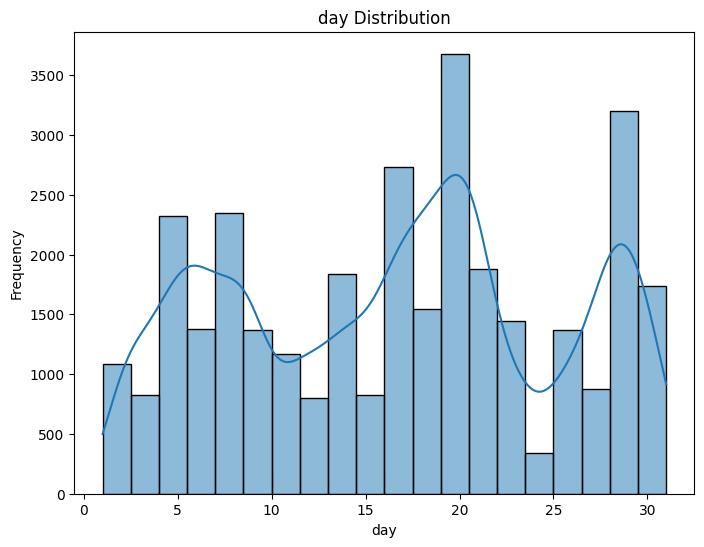

In [ ]:
# Visualize the distribution of 'day' using a histogram
plt.figure(figsize=(8,6))
sns.histplot(df['day'], bins=20,kde=True)
plt.title('day Distribution')
plt.xlabel('day')
plt.ylabel('Frequency')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32767 entries, 0 to 32772
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32767 non-null  int64  
 1   job             32767 non-null  object 
 2   marital         32766 non-null  object 
 3   education_qual  32766 non-null  object 
 4   call_type       32766 non-null  object 
 5   day             32766 non-null  float64
 6   mon             32766 non-null  object 
 7   dur             32766 non-null  float64
 8   num_calls       32766 non-null  float64
 9   prev_outcome    32766 non-null  object 
 10  y               32766 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 3.0+ MB


##Feature VS Target variable for ( catogory columns )

In [ ]:
# Plotting the figure using barplot
plt.figure(figsize=(20,15))

subplot = plt.subplot(231)
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=45)
plt.title('Job vs Target')


subplot = plt.subplot(232)
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.title('Marital vs Target')
plt.xticks(rotation=45)
plt.title('Marital vs Target')

subplot = plt.subplot(233)
sns.barplot(x= 'education_qual', y= 'y' , data = df , order = df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.title('Education vs Target')
plt.title('Education vs Target')
plt.title('Education vs Target')


subplot = plt.subplot(234)
sns.barplot(x= 'call_type', y= 'y' , data = df , order = df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.title('call_type vs Target')
plt.title('call_type vs Target')
plt.title('call_type vs Target')

subplot = plt.subplot(235)
sns.barplot(x= 'mon', y= 'y' , data = df , order = df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.title('mon vs Target')
plt.title('mon vs Target')
plt.title('mon vs Target')

subplot = plt.subplot(236)
sns.barplot(x= 'prev_outcome', y= 'y' , data = df , order = df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.title('prev_outcome vs Target')
plt.title('prev_outcome vs Target')
plt.title('prev_outcome vs Target')

plt.show()
plt.tight_layout()


##Feature VS Target variable for ( numerical columns )

In [ ]:
# Plotting the figure using barplot
df['age'] = df['age'].astype(int)

sorted_age = sorted(df['age'].unique())
plt.figure(figsize=(16,6))
sns.barplot(x='age', y='y', data=df, order=sorted_age)
plt.xticks(rotation=0)
plt.title('Age vs Target')
plt.show()


In [ ]:
# Plotting the figure using barplot
sorted_age = sorted(df['day'].unique())
plt.figure(figsize=(16,6))
sns.barplot(x='day', y='y', data=df, order=sorted_age)
plt.xticks(rotation=0)
plt.title('Day vs Target')
plt.show()

In [ ]:
# Plotting the figure using barplot
sorted_age = sorted(df['num_calls'].unique())
plt.figure(figsize=(16,6))
sns.barplot(x='num_calls', y='y', data=df, order=sorted_age)
plt.xticks(rotation=0)
plt.title('num_calls vs Target')
plt.show()

In [ ]:
df['education_qual'].value_counts()

# Label Encoding for [ 'job' , 'marital' , 'education_qual' 'mon'  ]:

In [ ]:
df['job'] = df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10})
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})
df['education_qual'] = df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2,'unknown':3})
df['mon'] = df['mon'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

In [ ]:
df.head()

# One-hot-encoding for [ 'call_type' , 'prev_outcome' ]:

In [ ]:
df = pd.get_dummies(df, columns=['call_type','prev_outcome'])
df.head()

# Target and Feature :

In [ ]:
x = df[['age','job','marital','education_qual','day','mon','dur','num_calls','call_type_cellular','call_type_telephone','call_type_unknown','prev_outcome_failure','prev_outcome_other','prev_outcome_success', 'prev_outcome_unknown']]
y = df['y']


# Train_test split :

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape , x_test.shape ,  y_train.shape , y_test.shape

# imbalance learning

In [ ]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [ ]:
# Step 2: Visualize Class Distribution
target_count.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Balancing the data using SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train, y_train = smt.fit_resample(x_train, y_train)

In [ ]:
# Checking whether it is balanced or not
x = len(x_train)
y = len(y_train)
print(x)
print(y)

In [ ]:

# Create a bar plot
categories = ['X_train', 'y_train']
lengths = [x, y]

plt.bar(categories, lengths)
plt.ylabel('Number of Samples')
plt.title('Length of X_train and y_train')

plt.show()


# SCALING the data ( use  scaled data if required ):

In [ ]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

# Modelling :

In [ ]:
# logistic regression :
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)

print("Training Accuracy :",Lr.score(x_train,y_train)*100)
print("Testing Accuracy :",Lr.score(x_test,y_test)*100)
print("accuracy Score :", accuracy_score(y_test,y_pred)*100)
print("F1 Score :", f1_score(y_test,y_pred)*100)
print("ROC AUC Score :", roc_auc_score(y_test,y_pred)*100)

In [ ]:
lr_train = Lr.score(x_train,y_train)*100
lr_test = Lr.score(x_test,y_test)*100
lr_auroc = roc_auc_score(y_test,y_pred)*100
lr_f1 = f1_score(y_test,y_pred)*100

In [ ]:
# decision tree :
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train, y_train) # the model is trained
  y_predict = dt.predict(x_train)

  trainAccuracy = accuracy_score(y_train, y_predict)

  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:
t = DecisionTreeClassifier(max_depth=20)
t.fit(x_train,y_train)
y_pred = t.predict(x_test)

print("Training Accuracy :",Lr.score(x_train,y_train)*100)
print("Testing Accuracy :",Lr.score(x_test,y_test)*100)
print("accuracy Score :", accuracy_score(y_test,y_pred)*100)
print("F1 Score :", f1_score(y_test,y_pred)*100)
print("ROC AUC Score :", roc_auc_score(y_test,y_pred)*100)

In [ ]:
dt_train = Lr.score(x_train,y_train)*100
dt_test = Lr.score(x_test,y_test)*100
dt_auroc = roc_auc_score(y_test,y_pred)*100
dt_f1 = f1_score(y_test,y_pred)*100

# Feature importants :

In [ ]:
# feature importance:
importance = t.feature_importances_

dt = DecisionTreeClassifier(max_depth = 20)
# Fit dt to the training set
dt.fit(x_train, y_train)
importance = dt.feature_importances_

feature_importance = list(zip(x_test.columns, importance)) # it calculates the feature importances based on IG

# Sort the list by importance in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the sorted list
for item in feature_importance:
    print(item)


#K-Nearest Neighbour

In [ ]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [ ]:
#K-Nearest Neighbors :
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train_scaled,y_train)
  y_pred = knn.predict(x_test_scaled)

  print("K value  : " , i, " train score : ", knn.score(x_train_scaled,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train_scaled, y_train, cv=10))) #predicting using the model





K value  :  1  train score :  1.0  cv score :  0.9482343748169377
K value  :  2  train score :  0.9794956893263141  cv score :  0.9429511218351635
K value  :  3  train score :  0.9724383916990921  cv score :  0.9476049023195696
K value  :  4  train score :  0.966563668268864  cv score :  0.9433325719152579
K value  :  5  train score :  0.9634927901121538  cv score :  0.9437520480242074
K value  :  6  train score :  0.9600404364080263  cv score :  0.940624049667648
K value  :  7  train score :  0.9581902800030518  cv score :  0.9418256081417544
K value  :  8  train score :  0.955806057831693  cv score :  0.9397848063692488
K value  :  9  train score :  0.9543945983062486  cv score :  0.9401471433759939
K value  :  10  train score :  0.951667048142214  cv score :  0.9382588932551773
K value  :  20  train score :  0.9430647745479515  cv score :  0.9339672278286347
K value  :  30  train score :  0.9383535515373465  cv score :  0.9303813925916955
K value  :  40  train score :  0.93474860761

In [116]:
knn = KNeighborsClassifier(2)
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)

print("Training Accuracy :",knn.score(x_train_scaled,y_train)*100)
print("Testing Accuracy :",knn.score(x_test_scaled,y_test)*100)
print("accuracy Score :", accuracy_score(y_test,y_pred)*100)
print("F1 Score :", f1_score(y_test,y_pred)*100)
print("ROC AUC Score :", roc_auc_score(y_test,y_pred)*100)

Training Accuracy : 97.94956893263141
Testing Accuracy : 86.21833867934963
accuracy Score : 86.21833867934963
F1 Score : 48.639736191261335
ROC AUC Score : 72.66531012617577


In [117]:
knn_train = Lr.score(x_train_scaled,y_train)*100
knn_test = Lr.score(x_test_scaled,y_test)*100
knn_auroc = roc_auc_score(y_test,y_pred)*100
knn_f1 = f1_score(y_test,y_pred)*100

#XG - BOOST

In [118]:
# xg - Boosting :
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print("Learning rate  : " , i, " train score : ", model.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate  :  0.01  train score :  0.9263179980163272  cv score :  0.9230377699507848
Learning rate  :  0.02  train score :  0.9340428778515297  cv score :  0.9288171696452814
Learning rate  :  0.03  train score :  0.9415579461356527  cv score :  0.935321319761899
Learning rate  :  0.04  train score :  0.9471274891279469  cv score :  0.9404712797055836
Learning rate  :  0.05  train score :  0.954051270313573  cv score :  0.9458310031732868
Learning rate  :  0.06  train score :  0.9573510337987335  cv score :  0.9490735271526802
Learning rate  :  0.07  train score :  0.9594491493095293  cv score :  0.9514005520196147
Learning rate  :  0.08  train score :  0.9620241092545968  cv score :  0.9530027245862527
Learning rate  :  0.09  train score :  0.9640077821011673  cv score :  0.9545286522543494
Learning rate  :  0.1  train score :  0.965228503852903  cv score :  0.9551580774511361
Learning rate  :  0.11  train score :  0.965972381170367  cv score :  0.9561117299401692
Learning rate  

In [119]:
xg = XGBClassifier(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)

print("Training Accuracy :",xg.score(x_train,y_train)*100)
print("Testing Accuracy :",xg.score(x_test,y_test)*100)
print("accuracy Score :", accuracy_score(y_test,y_pred)*100)
print("F1 Score :", f1_score(y_test,y_pred)*100)
print("ROC AUC Score :", roc_auc_score(y_test,y_pred)*100)

Training Accuracy : 99.58991378652628
Testing Accuracy : 86.27364229620618
accuracy Score : 86.27364229620618
F1 Score : 57.16258198136003
ROC AUC Score : 82.27261208975354


In [120]:
xg_train = Lr.score(x_train,y_train)*100
xg_test = Lr.score(x_test,y_test)*100
xg_auroc = roc_auc_score(y_test,y_pred)*100
xg_f1 = f1_score(y_test,y_pred)*100

# Random Forest :

In [121]:
# Define a list of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depth_values:
    random = RandomForestClassifier(max_depth=depth, n_estimators=100, max_features="sqrt")
    random.fit(x_train, y_train)


    valAccuracy = cross_val_score(random, x_train, y_train, cv=10, scoring='f1')

    print("Depth: ", depth, "Training Accuracy: ", random.score(x_train, y_train), "Cross val score: ", np.mean(valAccuracy))


Depth:  1 Training Accuracy:  0.7492179751277943 Cross val score:  0.8450793439573839
Depth:  2 Training Accuracy:  0.8663500419623102 Cross val score:  0.8862301028511276
Depth:  3 Training Accuracy:  0.8841268024719615 Cross val score:  0.9008842369525605
Depth:  4 Training Accuracy:  0.8931296253910125 Cross val score:  0.9116532436159555
Depth:  5 Training Accuracy:  0.9093232623788815 Cross val score:  0.9191626169798239
Depth:  6 Training Accuracy:  0.9137293049515526 Cross val score:  0.9256065940971692
Depth:  7 Training Accuracy:  0.9249446860456245 Cross val score:  0.9357846627581864
Depth:  8 Training Accuracy:  0.9349202716105898 Cross val score:  0.9401748438634767
Depth:  9 Training Accuracy:  0.942549782558938 Cross val score:  0.9432105383427013
Depth:  10 Training Accuracy:  0.9505416952773327 Cross val score:  0.9471180729448851


In [123]:
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(x_train, y_train)
predictions = random.predict(x_test)

print("Training Accuracy :",random.score(x_train,y_train)*100)
print("Testing Accuracy :",random.score(x_test,y_test)*100)
print("accuracy Score :", accuracy_score(y_test,predictions)*100)
print("F1 Score :", f1_score(y_test,predictions)*100)
print("ROC AUC Score :", roc_auc_score(y_test,predictions)*100)

Training Accuracy : 95.0656137941558
Testing Accuracy : 82.63466430704568
accuracy Score : 82.63466430704568
F1 Score : 53.301606186793585
ROC AUC Score : 82.94356246606216


In [125]:
random_train = random.score(x_train,y_train)*100
random_test = random.score(x_test,y_test)*100
random_f1 = f1_score(y_test,predictions)*100
random_auroc = roc_auc_score(y_test,predictions)*100

# conclusion :

In [127]:
# Creating a dataframe to analyse the best value of F1_Score
models = {'Model_Classifier':['Logistic Regression','Decision Tree','K-Nearest Neighbour','XG-Boost','Random Forest'],
          'Train_Accuracy':[lr_train,dt_train,knn_train,xg_train,random_train],
          'Test_Accuracy': [lr_test,dt_test,knn_test,xg_test,random_test],
          'roc_auc_score': [lr_auroc,dt_auroc,knn_auroc,xg_auroc,random_auroc],
          'F1_Score':      [lr_f1,dt_f1,knn_f1,xg_f1,random_f1]}

In [133]:
# Assuming `models` is a list of models
mdf = pd.DataFrame(models)

# Displaying the styled dataframe
display(mdf)

,Model_Classifier,Train_Accuracy,Test_Accuracy,roc_auc_score,F1_Score
0,Logistic Regression,87.983520,76.252627,77.712522,44.363825
1,Decision Tree,87.983520,76.252627,78.046167,51.153324
2,K-Nearest Neighbour,68.627451,75.721712,72.665310,48.639736
3,XG-Boost,87.983520,76.252627,82.272612,57.162582
4,Random Forest,95.065614,82.634664,82.943562,53.301606
